In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['labels.csv', 'train', 'test', 'sample_submission.csv']


In [2]:
trainlist = os.listdir("../input/train")
testlist = os.listdir("../input/test")
df_sample = pd.read_csv('../input/sample_submission.csv')
df_labels = pd.read_csv('../input/labels.csv')

Printing the first 5 rows of each dataframes :

In [3]:
df_sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [4]:
df_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
df_labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,2ba1e0f500b72e3e2abe67bc913b3335,scottish_deerhound
freq,1,126


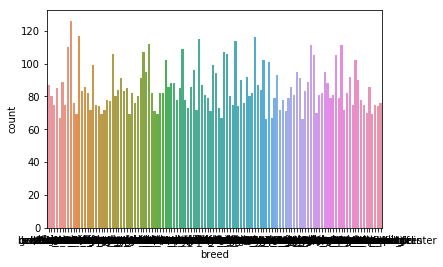

In [6]:
import seaborn as sns
sns.countplot(x='breed',data = df_labels)

The groups look balanced enough. We proceed to preprocessing the data. First we set the Y, or label data as one hot vectors.

In [11]:
from keras.utils import to_categorical
from numpy import array
breeds = df_labels['breed'].tolist()
breed = df_labels['breed'].unique()
unq_to_breed = dict()
for i in range(len(df_labels)):
    unq_to_breed[str(df_labels['id'][i])]=(df_labels['breed'][i])
breed_to_id = dict((j,i) for i,j in enumerate(breed))
id_list = to_categorical(list(breed_to_id.values())).astype(np.float32)
c=0
for i in unq_to_breed:
    print(i,":",unq_to_breed[i])
    c+=1
    if c==10:
        break

000bec180eb18c7604dcecc8fe0dba07 : boston_bull
001513dfcb2ffafc82cccf4d8bbaba97 : dingo
001cdf01b096e06d78e9e5112d419397 : pekinese
00214f311d5d2247d5dfe4fe24b2303d : bluetick
0021f9ceb3235effd7fcde7f7538ed62 : golden_retriever
002211c81b498ef88e1b40b9abf84e1d : bedlington_terrier
00290d3e1fdd27226ba27a8ce248ce85 : bedlington_terrier
002a283a315af96eaea0e28e7163b21b : borzoi
003df8b8a8b05244b1d920bb6cf451f9 : basenji
0042188c895a2f14ef64a918ed9c7b64 : scottish_deerhound


In [12]:
c=0
for i in breed_to_id:
    print(i,":",breed_to_id[i])
    c+=1
    if c==10:
        break

boston_bull : 0
dingo : 1
pekinese : 2
bluetick : 3
golden_retriever : 4
bedlington_terrier : 5
borzoi : 6
basenji : 7
scottish_deerhound : 8
shetland_sheepdog : 9


In [14]:
#we have unq to breed and breed to id so now we create unq to id ! 
unq_to_id = dict()
for i in unq_to_breed : 
    unq_to_id[i] = id_list[breed_to_id[unq_to_breed[i]]]
c=0
for i in  unq_to_id:
    print(i,":", unq_to_id[i])
    c+=1
    if c==5:
        break

000bec180eb18c7604dcecc8fe0dba07 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
001513dfcb2ffafc82cccf4d8bbaba97 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
001cdf01b096e06d78e9e5112d419397 : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

As Unq_to_id is our final preprocessing stuff, let's see what it actually is :
---

In [15]:
print("length : ",len(unq_to_id))
print("First element :",unq_to_id["000bec180eb18c7604dcecc8fe0dba07"])
print("Element length : ",len(unq_to_id["000bec180eb18c7604dcecc8fe0dba07"]))
print("\nLets see if all's well\n")
print("Checking for 0f04466edd10d6c1d27e123399cf4433")
print("unq to breed : ",unq_to_breed["0f04466edd10d6c1d27e123399cf4433"])
print("breed to id : ",breed_to_id[unq_to_breed["0f04466edd10d6c1d27e123399cf4433"]])
print("unq to id : ",unq_to_id["0f04466edd10d6c1d27e123399cf4433"])

length :  10222
First element : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Element length :  120

Lets see if all's well

Checking for 0f04466edd10d6c1d27e123399cf4433
unq to breed :  australian_terrier
breed to id :  42
unq to id :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Thus we see that the unq_to_id ( unique to id ) dict contains a mapping from id to one hot encoded vectors of length 120. All's cool till now.
---

The Y part is done. Now off to preprocessing the images as X.

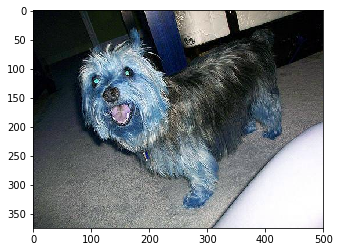

In [16]:
#Plotting a random image
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("../input/train/0f04466edd10d6c1d27e123399cf4433.jpg")
%matplotlib inline
imgplot = plt.imshow(image)

In [17]:
#storing all images in a variable X
X = []
Y = []
for i in range(len(trainlist)):
    image = cv2.imread("../input/train/"+trainlist[i])
    image = cv2.resize(image,(120,120), interpolation = cv2.INTER_CUBIC)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    X.append(image)
    Y.append(unq_to_id[trainlist[i][0:len(trainlist[i])-4]])
print("Preprocessing done")    

Preprocessing done


In [18]:
X=np.array(X)
X=X.reshape(len(X),120,120,1)
X.shape[1:]

(120, 120, 1)

In [19]:
X.shape

(10222, 120, 120, 1)

In [20]:
Y=np.array(Y)
class_totals = Y.sum(axis=0)
class_weight = class_totals.max() / class_totals
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
print("X length : ",len(X))
print("Y length : ",len(Y))
print("X.shape : ", X.shape)
print("Y.shape : ", Y.shape)

X length :  10222
Y length :  10222
X.shape :  (10222, 120, 120, 1)
Y.shape :  (10222, 120)


Now we build our model using keras ! 
---

In [22]:
from keras.utils import np_utils
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [23]:
nb_filters = 32
nb_classes = 120
nb_pool = 2
nb_conv = 3

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 118, 118, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 57, 57, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
__________

In [24]:
validation_split = 0.10
model.fit(X, Y, batch_size=20, class_weight=class_weight, epochs=10, verbose=1, validation_split=validation_split)

Train on 9199 samples, validate on 1023 samples
Epoch 1/10
9199/9199 [==============================] - 16s 2ms/step - loss: 4.8024 - acc: 0.0109 - val_loss: 4.7546 - val_acc: 0.0186
Epoch 2/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.6946 - acc: 0.0183 - val_loss: 4.6721 - val_acc: 0.0166
Epoch 3/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.5737 - acc: 0.0260 - val_loss: 4.5834 - val_acc: 0.0332
Epoch 4/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.4944 - acc: 0.0286 - val_loss: 4.5361 - val_acc: 0.0293
Epoch 5/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.4380 - acc: 0.0347 - val_loss: 4.5147 - val_acc: 0.0313
Epoch 6/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.3801 - acc: 0.0411 - val_loss: 4.5759 - val_acc: 0.0293
Epoch 7/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.3219 - acc: 0.0458 - val_loss: 4.5214 - val_acc: 0.0362
Epoch 8

As expected the accuracy is low as we are not using pretrained weights and training the model on local system itself. Let's try with VGG19 model next : 

In [25]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
vgg = VGG19(#weights='imagenet',
    weights = None, include_top=False, input_shape=(120, 120, 1))
x = vgg.output
x = Flatten()(x)
predictions = Dense(nb_classes, activation='softmax')(x)
vggmodel = Model(inputs=vgg.input, outputs=predictions)
for layer in vgg.layers:
    layer.trainable = False

vggmodel.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
vggmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 120, 1)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 120, 120, 64)      640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 120, 120, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 60, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 60, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 60, 60, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 30, 30, 128)       0         
__________

In [26]:
validation_split = 0.10
vggmodel.fit(X, np.array(Y), batch_size=20, class_weight=class_weight, epochs=10, verbose=1, validation_split=validation_split)

Train on 9199 samples, validate on 1023 samples
Epoch 1/10
9199/9199 [==============================] - 53s 6ms/step - loss: 4.8842 - acc: 0.0139 - val_loss: 4.8514 - val_acc: 0.0186
Epoch 2/10
9199/9199 [==============================] - 51s 6ms/step - loss: 4.7045 - acc: 0.0263 - val_loss: 4.7727 - val_acc: 0.0166- loss - ETA: 2s - loss: 4.7042 - acc: 0.02 - ETA: 2s - loss
Epoch 3/10
9199/9199 [==============================] - 51s 6ms/step - loss: 4.6131 - acc: 0.0319 - val_loss: 4.8195 - val_acc: 0.0196.03
Epoch 4/10
9199/9199 [==============================] - 51s 6ms/step - loss: 4.5463 - acc: 0.0404 - val_loss: 4.7798 - val_acc: 0.0274
Epoch 5/10
9199/9199 [==============================] - 51s 6ms/step - loss: 4.4811 - acc: 0.0478 - val_loss: 4.7047 - val_acc: 0.0225
Epoch 6/10
9199/9199 [==============================] - 51s 6ms/step - loss: 4.4202 - acc: 0.0516 - val_loss: 4.7560 - val_acc: 0.0254A: 2s -
Epoch 7/10
9199/9199 [==============================] - 51s 6ms/step - l

As we see, we don't get good accuracy as we don't use fully trained weights.